# Practica redes convolucionales : Clasificación de flores

___

Sergio David Díaz Veru

En la siguiente guía aplicaran los conceptos de redes convolucionales para realizar la clasificación de imágenes de flores. Experimente.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahmasleam/flowers-dataset")

print("Path to dataset files:", path)

100%|██████████| 219M/219M [00:06<00:00, 35.1MB/s] 

Extracting files...


Path to dataset files: C:\Users\vidam\.cache\kagglehub\datasets\rahmasleam\flowers-dataset\versions\1


## Importe de librerias

In [12]:
# import system libraries
import os
import itertools
from PIL import Image
import cv2
from matplotlib.image import imread
import pathlib
import random

# import data handling tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# import Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Waring Library
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.listdir(path)

['flower_photos']

## Data frame para guardar las rutas a las imágenes

In [17]:
data_dir = path+'/flower_photos'
filepaths = []
labels = []

folders = os.listdir(data_dir)
for fold in folders:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)
        
# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis=1)

In [18]:
df

,filepaths,labels
0,C:\Users\vidam\.cache\kagglehub\datasets\rahma...,daisy
1,C:\Users\vidam\.cache\kagglehub\datasets\rahma...,daisy
2,C:\Users\vidam\.cache\kagglehub\datasets\rahma...,daisy
3,C:\Users\vidam\.cache\kagglehub\datasets\rahma...,daisy
4,C:\Users\vidam\.cache\kagglehub\datasets\rahma...,daisy
...,...,...
3665,C:\Users\vidam\.cache\kagglehub\datasets\rahma...,tulips
3666,C:\Users\vidam\.cache\kagglehub\datasets\rahma...,tulips
3667,C:\Users\vidam\.cache\kagglehub\datasets\rahma...,tulips
3668,C:\Users\vidam\.cache\kagglehub\datasets\rahma...,tulips


* Muestra de las imagenes asociadas a cada categoría

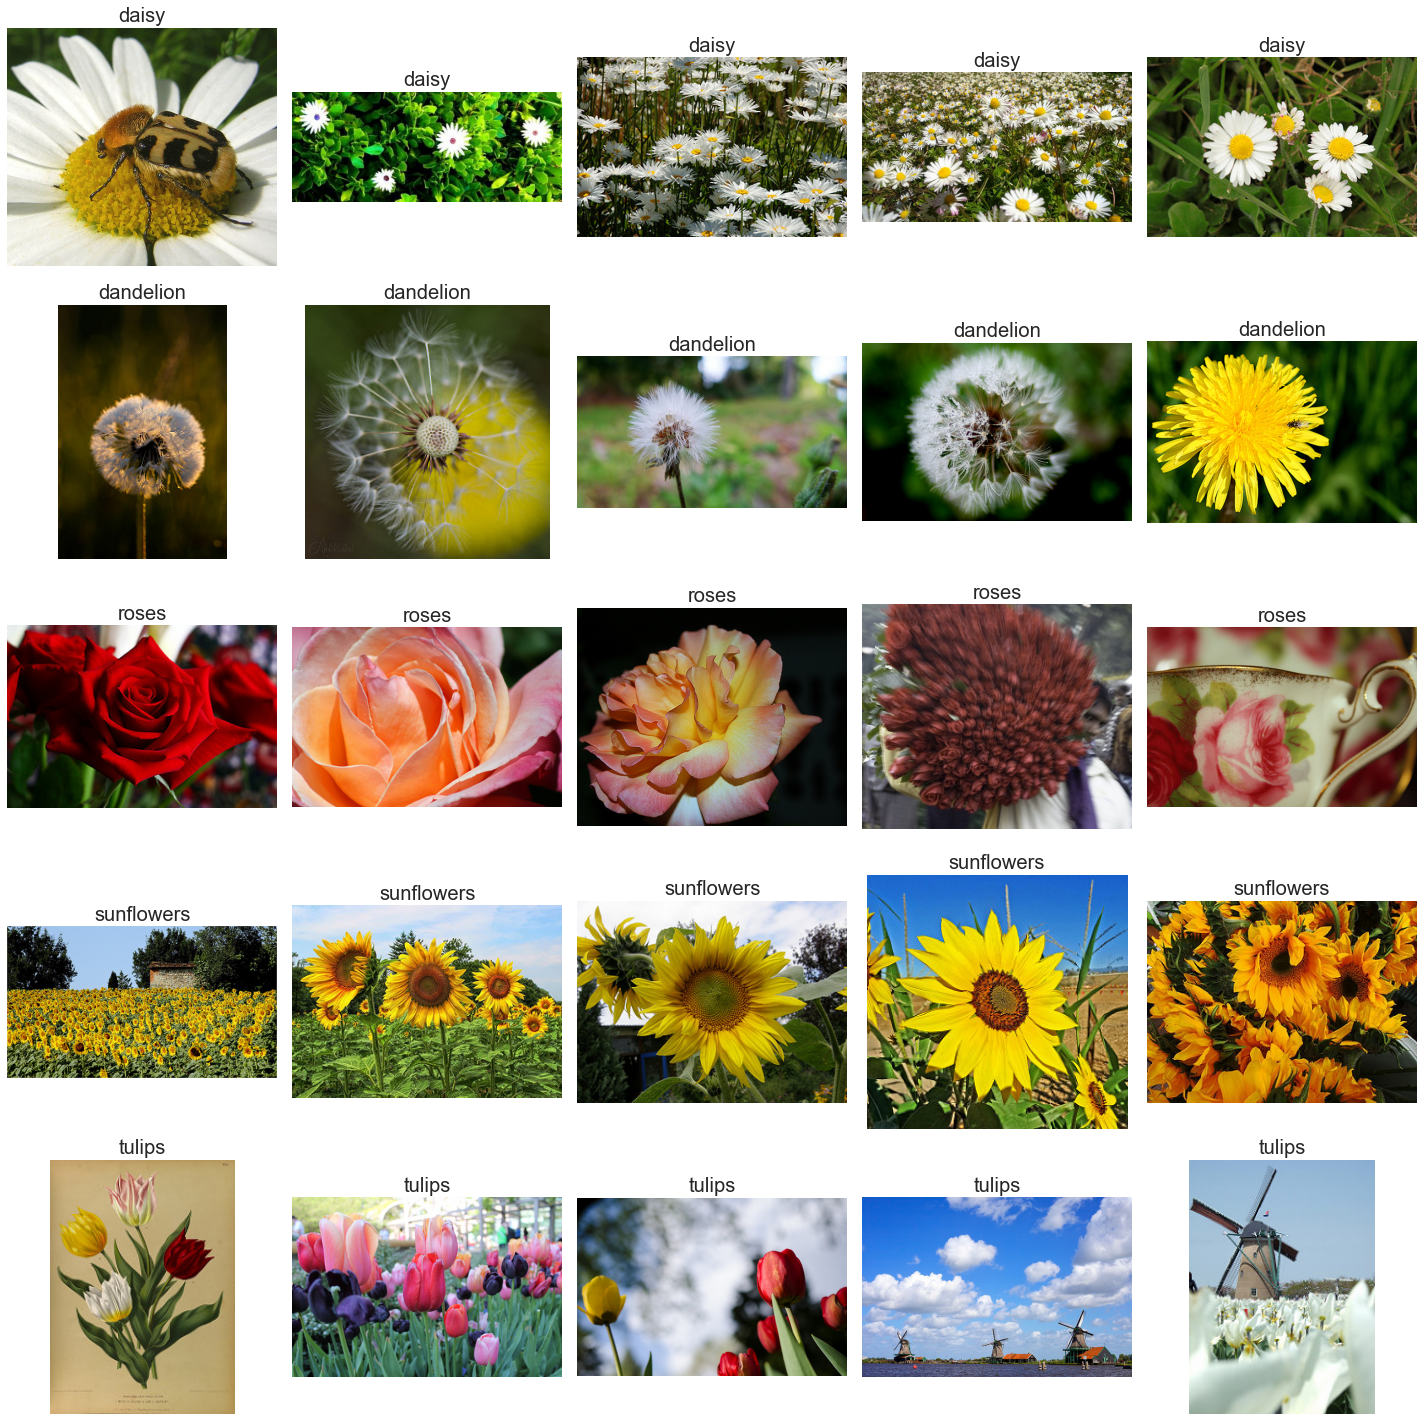

In [19]:
# Set the number of images to display per species
num_images = 5

# Get unique flower species labels
flower_species = df['labels'].unique()

# Set up the plot
plt.figure(figsize=(20, 20))

# Loop through each flower species
for idx, flower in enumerate(flower_species):
    # Filter the DataFrame to get file paths for this flower species
    flower_df = df[df['labels'] == flower].sample(num_images)  # Get a random sample of 16 images
    
    # Loop through the 16 images and plot them
    for i, file in enumerate(flower_df['filepaths'].values):
        plt.subplot(len(flower_species), num_images, idx * num_images + i + 1)
        img = Image.open(file)
        plt.imshow(img)
        plt.axis('off')
        plt.title(flower)
        
# Show the plot
plt.tight_layout()
plt.show()

* Generación conjuntos de prueba, validación y entrenamiento

In [21]:
strat = df['labels']
# Agregue el resto del código

In [ ]:
print(f"Número de muestras en el conjunto de entrenamiento: {len(train_df)}\nNúmero de muestras en el conjunto de validación: {len(valid_df)}\nNúmero de muestras en el conjunto de pruebas: {len(test_df)}")

## CNN

In [ ]:
# Crea la estructura del modelo
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

In [ ]:
model = Sequential([
   # Aguegue las capas que desee para el tratamiento de las imagenes
    
])

model.compile(Adamax(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy']) ## Verifique si es posible modificar la línea de código

In [ ]:
## Agregue el resumen del modelo

In [ ]:
# Actualice algunos hiperparametros

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0,
    mode=min,
    monitor='val_loss',
    verbose=0,
    restore_best_weights=True,
    baseline=None
)

plateau = ReduceLROnPlateau(
    patience=4,
    mode=min,
    monitor='val_loss',
    factor=.2,
    verbose=0
)

In [ ]:
## Realice el entrenamiento con el segundo modelo

In [ ]:
# Defina las mejores variables
tr_acc = history2.history['acc']
tr_loss = history2.history['loss']
val_acc = history2.history['val_acc']
val_loss = history2.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'